In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-06-11'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just do the contrast with no jitter

In [65]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4
mu_c=0
sigma_c=0
blur=4
open_eye_noise=0.1

Nsim=11
mu_c_mat=array( list(linspace(0,20,Nsim))+ [3]*Nsim )
sigma_c_mat=array([1]*Nsim + list(linspace(0,6,Nsim)))

contrast_mat=linspace(0,1,6)  # linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,50,90])


contrast_mat,mu_c_mat,sigma_c_mat,f_mat

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.6,
        1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 array([10, 50, 90]))

In [66]:
from collections import namedtuple


params = namedtuple('params', ['count', 'eta','blur','contrast','f','mask','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0

tmp=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    tmp+=1
    for mask in mask_mat:
        if mask:
            for fc,f in enumerate(f_mat):
                for contrast_count,contrast in enumerate(contrast_mat):
                    all_params.append(params(count=count,
                                 eta=eta,
                                     blur=blur,
                                             contrast=contrast,
                                             f=f,
                                             mask=mask,
                                 number_of_neurons=number_of_neurons,
                                sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.2f} contrast {mask} mask {f} f.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))

                    count+=1

        else:
            f=10
            for contrast_count,contrast in enumerate(contrast_mat):
                all_params.append(params(count=count,
                             eta=eta,
                                 blur=blur,
                                         contrast=contrast,
                                         f=f,
                                         mask=mask,
                             number_of_neurons=number_of_neurons,
                            sfname=f'{base}/contrast mask {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur {contrast:.2f} contrast {mask} mask {f} f.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

                count+=1



for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params),tmp)

params(count=0, eta=1e-06, blur=4, contrast=0.0, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.00 contrast 0 mask 10 f.asdf', mu_c=0.0, sigma_c=1.0)
params(count=1, eta=1e-06, blur=4, contrast=0.2, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.20 contrast 0 mask 10 f.asdf', mu_c=0.0, sigma_c=1.0)
params(count=2, eta=1e-06, blur=4, contrast=0.4, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.40 contrast 0 mask 10 f.asdf', mu_c=0.0, sigma_c=1.0)
params(count=3, eta=1e-06, blur=4, contrast=0.6000000000000001, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.60 contrast 0 mask 10 f.asdf', mu_c=0.0, sigma_c=1.0)
params(count=4, eta=1e-06, blur=4, contrast=0.8, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/cont

In [6]:
blur

4

## Functions for contrast mask

In [7]:
def run_one_continuous_mask_jitter(params,
                                    overwrite=False,
                                 run=True):
    import plasticnet as pn
    count,eta,blur,contrast,mask,f,mu_c,sigma_c,number_of_neurons,sfname=(params.count,params.eta,params.blur,params.contrast,params.mask,params.f,
                                        params.mu_c,params.sigma_c,params.number_of_neurons,params.sfname)
    
    
    if os.path.exists(sfname):
        if not overwrite:
            return sfname
        else:
            os.remove(sfname)

    
    seq=pn.Sequence()
    deficit_base_sim=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf'

    seq+=treatment_jitter(f=f,
                   mask=mask,
                   contrast=contrast,
                   total_time=8*day,
                   eta=eta,
                          number_of_neurons=number_of_neurons,
                    mu_c=mu_c,sigma_c=sigma_c,
                   save_interval=20*minute)

    if run:
        
        seq_load(seq,deficit_base_sim)    
        
        seq.run(display_hash=False)
        pn.save(sfname,seq) 

    
    return sfname
    
    


In [8]:
func=run_one_continuous_mask_jitter

## Premake the image files

In [9]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)


# somehow calling these functions breaks the multiprocessing?
# Process ForkPoolWorker-1:
#_pickle.UnpicklingError: NEWOBJ class argument isn't a type object


# so run this, then restart kernel, and then skip this cell
# until I can figure out why this does this
for params in all_params:
    func(params,overwrite=False,run=False)



Base Image File: asdf/bbsk081604_all_scale2.asdf


In [10]:
params

params(count=527, eta=1e-06, blur=4, contrast=1.0, f=90, mask=1, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 3.0 mu_c 6.0 sigma_c 4 blur 1.00 contrast 1 mask 90 f.asdf', mu_c=3.0, sigma_c=6.0)

In [11]:
len(all_params)

528

## Run the sims

In [13]:
do_params=make_do_params(all_params)
len(do_params)

0

In [10]:
%%time
print(func.__name__)
func(do_params[0],overwrite=True)

run_one_continuous_mask_jitter
[.] Sequence Time Elapsed...3 m, 37.77 s
CPU times: user 3min 42s, sys: 1.25 s, total: 3min 44s
Wall time: 3min 44s


'sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.00 contrast 0 mask 10 f.asdf'

In [11]:
real_time=4*60+ 10

In [12]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=0, eta=1e-06, blur=4, contrast=0.0, f=10, mask=0, number_of_neurons=25, sfname='sims/2023-06-11/contrast mask 25 neurons 0.0 mu_c 1.0 sigma_c 4 blur 0.00 contrast 0 mask 10 f.asdf', mu_c=0.0, sigma_c=1.0)
1
1 m, 2.50 s


In [ ]:
if do_params:
    pool = Pool(processes=number_of_processes)
    async_results = [pool.apply_async(func, args=(p,),kwds={'overwrite':False,'run':True}) 
                             for p in do_params]
    results =[_.get() for _ in async_results]
    
results

## View the sims

In [ ]:
sfname=all_params[0].sfname
R=Results(sfname)

In [ ]:
t,y,θ,W=R[-1]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


In [ ]:
# RR={}
# count=0
# for params in tqdm(all_params):
#     RR[params.sfname]=Results(params.sfname)

In [14]:
contrast_mat,mu_c_mat,sigma_c_mat,f_mat

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.,  3.,  3.,
         3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.]),
 array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0.6,
        1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 array([10, 50, 90]))

In [15]:
params=[_ for _ in all_params if 
    _.mu_c==mu_c_mat[0] and 
    _.f==f_mat[0] and
    _.mask==1]
assert len(params)==len(contrast_mat)

## versus $\mu_c$

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

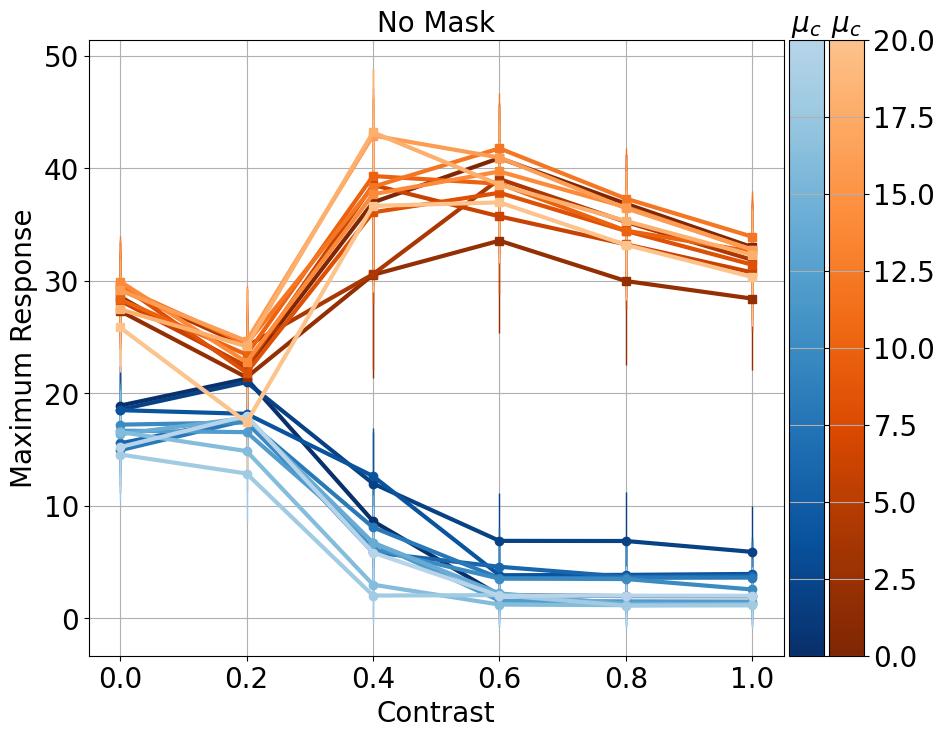

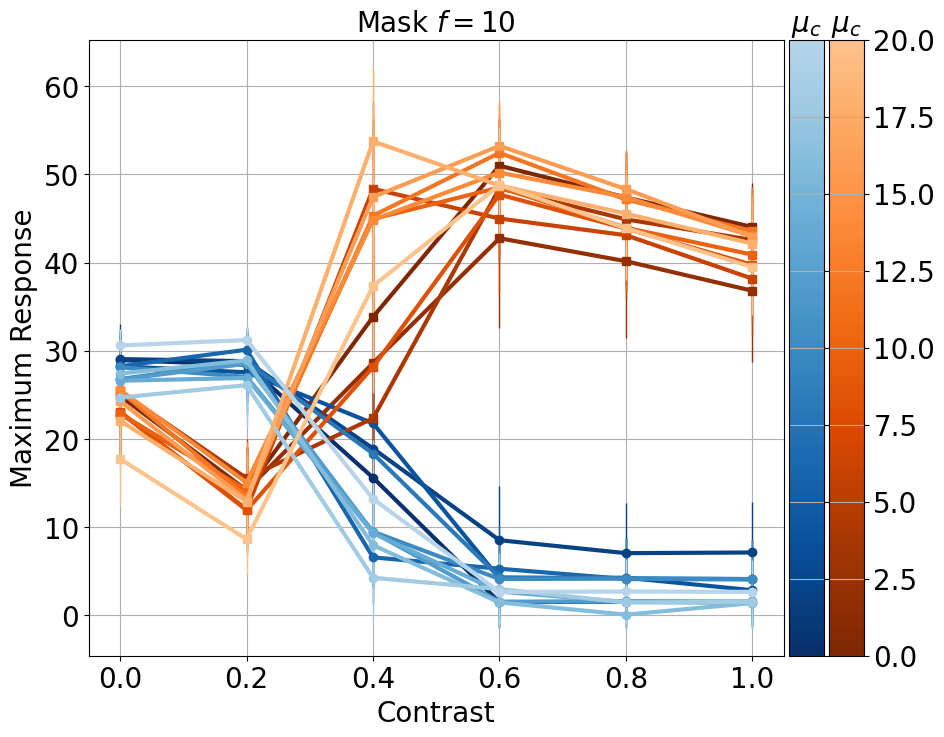

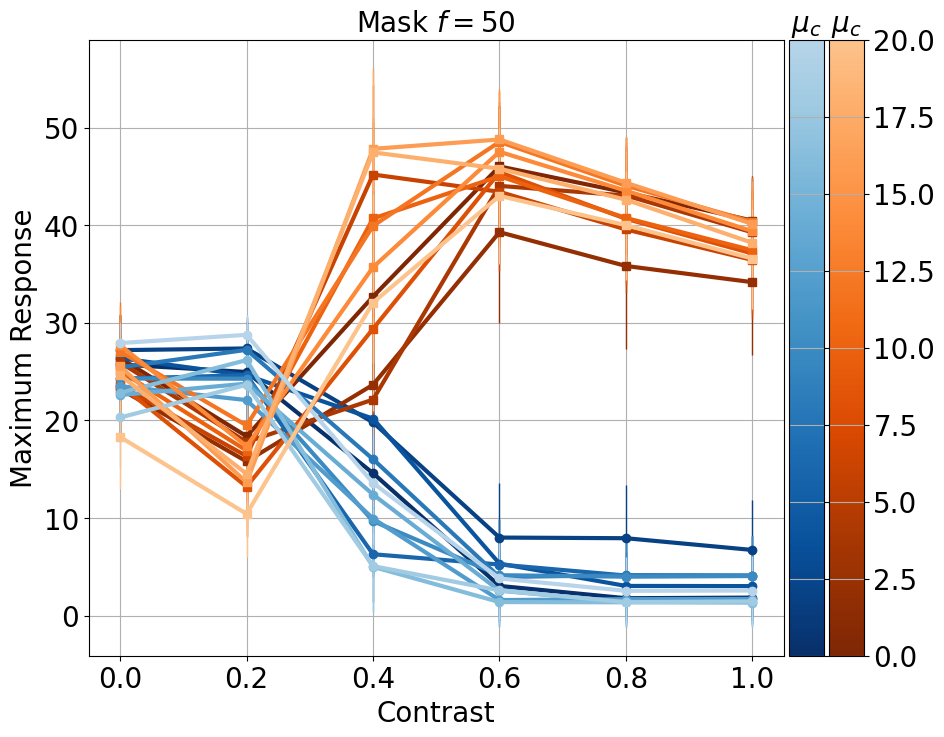

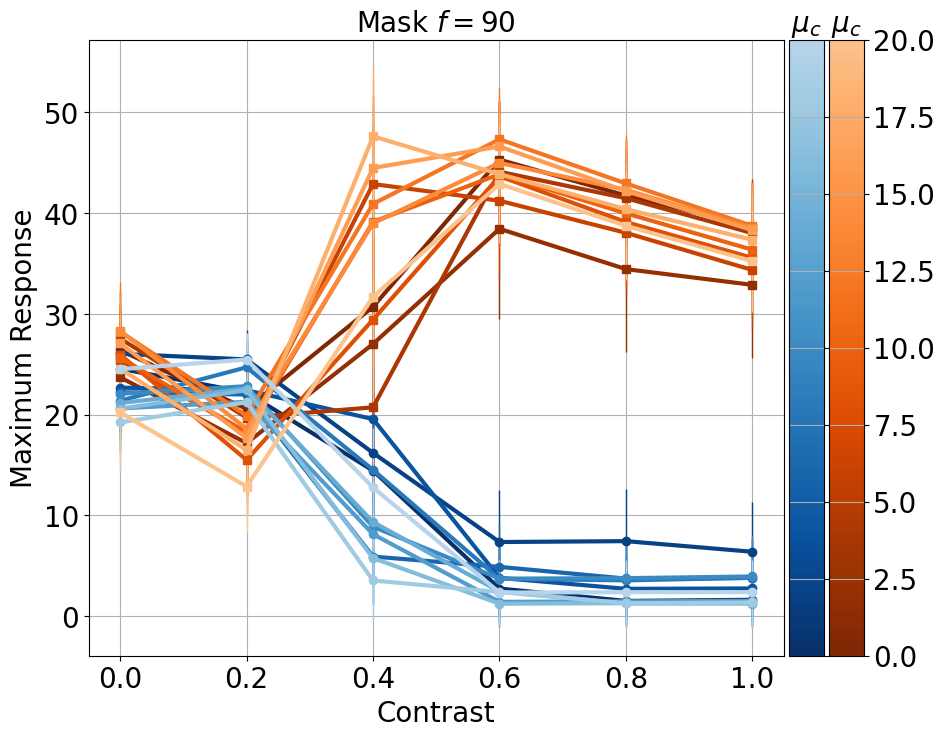

In [16]:
v=np.flip(linspace(0.3,1,Nsim))

figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n] and 
        _.sigma_c==sigma_c_mat[n] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]
        s+=contrast,μ1,μ2,σ1,σ2
        
    contrast,μ1,μ2,σ1,σ2=s.arrays()

    errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[n]))
    errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[n]))


xlabel('Contrast')
ylabel('Maximum Response')
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\mu_c$')
plt.gcf().add_axes(ax_cb2)
title(r'$\mu_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n] and 
            _.sigma_c==sigma_c_mat[n] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]
            s+=contrast,μ1,μ2,σ1,σ2

        contrast,μ1,μ2,σ1,σ2=s.arrays()

        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[n]))
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[n]))


    xlabel('Contrast')
    ylabel('Maximum Response')
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    ax_cb.set_yticklabels([])
    ax_cb2.grid(True)
    title(r'$\mu_c$')
    plt.gcf().add_axes(ax_cb2)
    title(r'$\mu_c$')



## versus $\sigma_c$

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

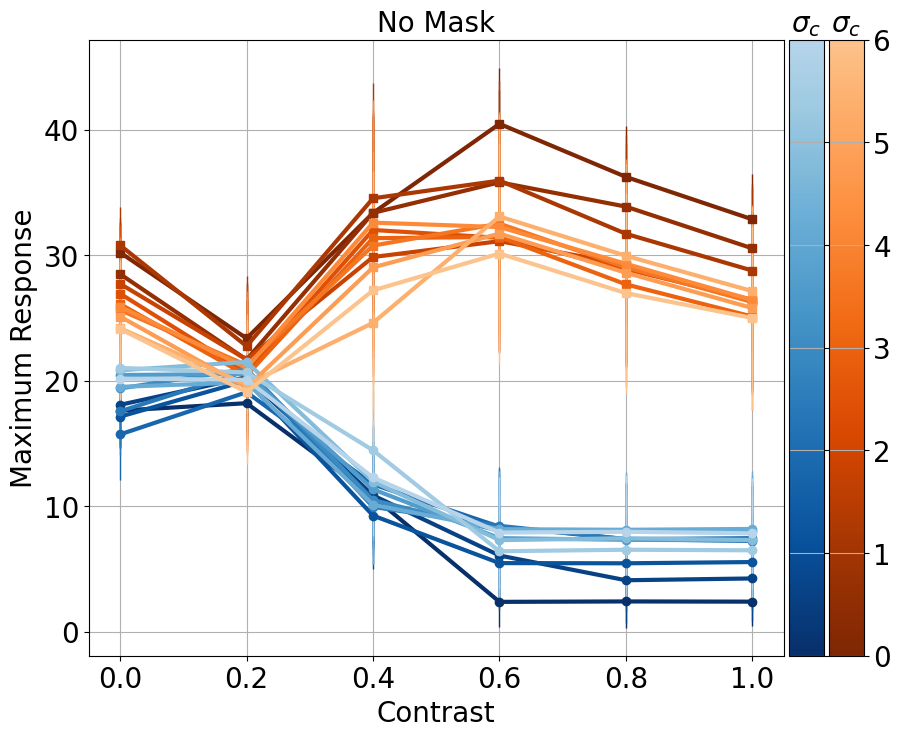

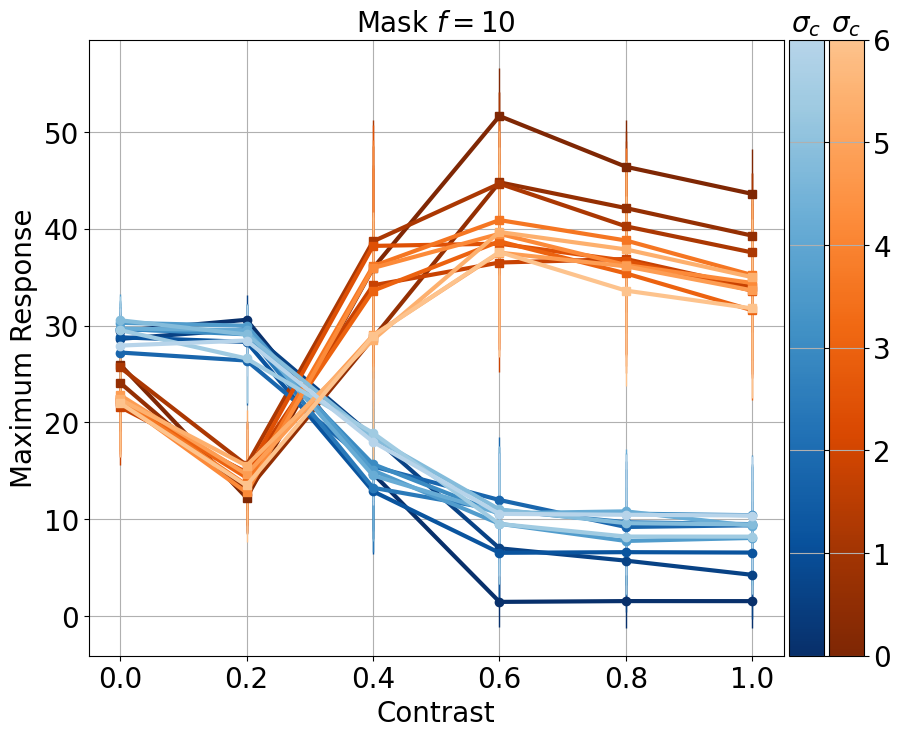

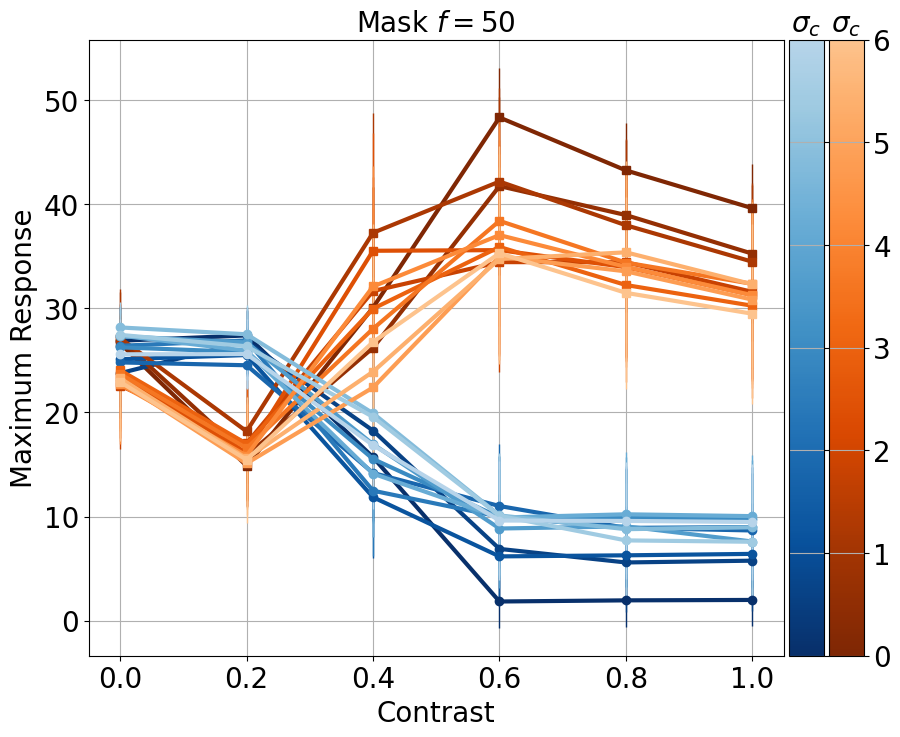

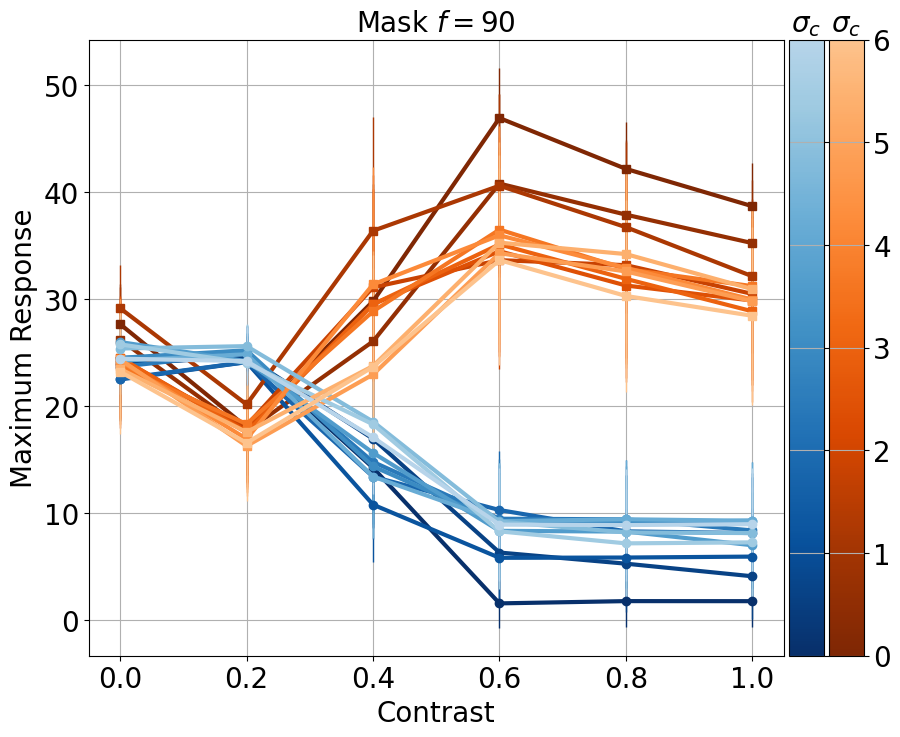

In [17]:
v=np.flip(linspace(0.3,1,Nsim))

figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n+Nsim] and 
        _.sigma_c==sigma_c_mat[n+Nsim] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]
        s+=contrast,μ1,μ2,σ1,σ2
        
    contrast,μ1,μ2,σ1,σ2=s.arrays()

    errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[n]))
    errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[n]))


xlabel('Contrast')
ylabel('Maximum Response')
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\sigma_c$')
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n+Nsim] and 
            _.sigma_c==sigma_c_mat[n+Nsim] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]
            s+=contrast,μ1,μ2,σ1,σ2

        contrast,μ1,μ2,σ1,σ2=s.arrays()

        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[n]))
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[n]))


    xlabel('Contrast')
    ylabel('Maximum Response')
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    ax_cb.set_yticklabels([])
    ax_cb2.grid(True)
    title(r'$\sigma_c$')
    plt.gcf().add_axes(ax_cb2)
    title(r'$\sigma_c$')



## ODI

  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\mu_c$')

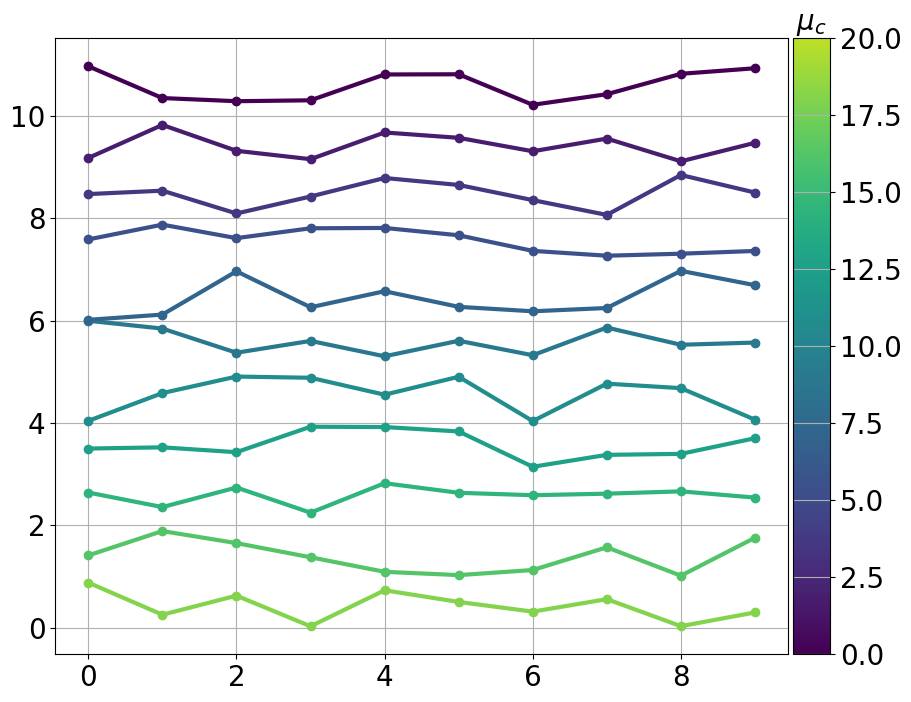

In [43]:
top=.9
v=np.flip(linspace(0,top,Nsim))

viridis=truncate_colormap(cm.viridis,0, top)

for n in tqdm(range(Nsim),total=Nsim): 
    plot(rand(10)+n,'-o',color=viridis(v[n]))
    
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')    

  0%|          | 0/11 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\mu_c$')

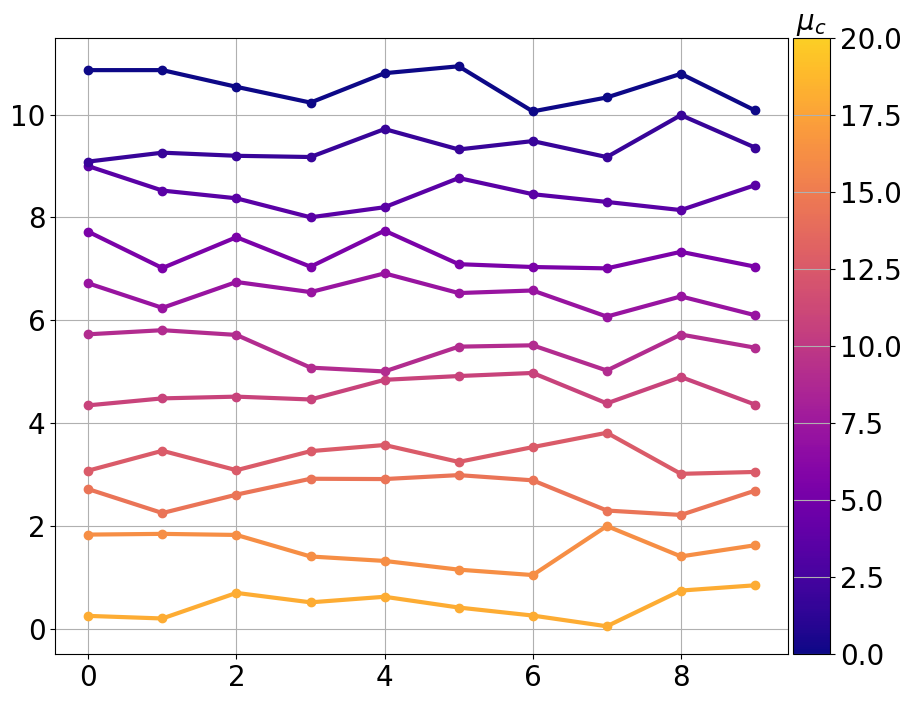

In [44]:
top=.9
v=np.flip(linspace(0,top,Nsim))

plasma=truncate_colormap(cm.plasma,0, top)

for n in tqdm(range(Nsim),total=Nsim): 
    plot(rand(10)+n,'-o',color=plasma(v[n]))
    
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')    

In [62]:
ODI_results={}
for params in tqdm(all_params):
    R=Results(params.sfname)
    ODI_start=R.ODI[0,:]
    ODI_end=R.ODI[-1,:]
    
    ODI_results[params.sfname]=(ODI_start,ODI_end)
    
    
savevars('results/2023-06-11 - Contrast Sims - Results.asdf','all_params','ODI_results')

  0%|          | 0/528 [00:00<?, ?it/s]

Saving results/2023-06-11 - Contrast Sims - Results.asdf...done.


In [67]:
if os.path.exists('results/2023-06-11 - Contrast Sims - Results.asdf'):
    loadvars('results/2023-06-11 - Contrast Sims - Results.asdf','ODI_results')

Found ['all_params', 'ODI_results']


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

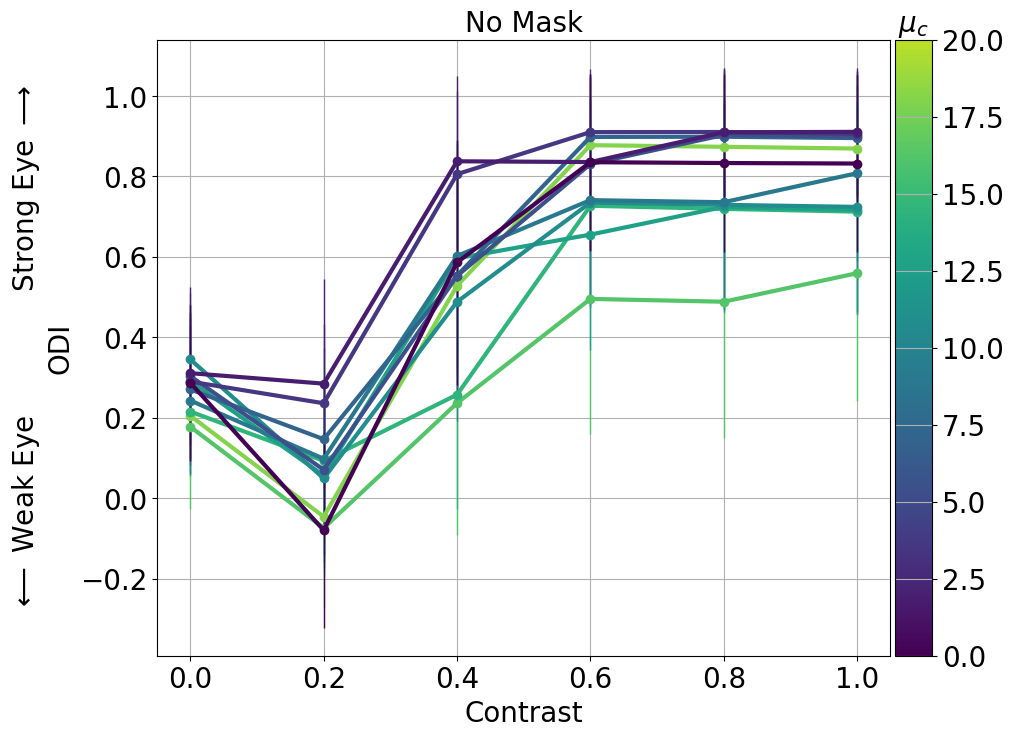

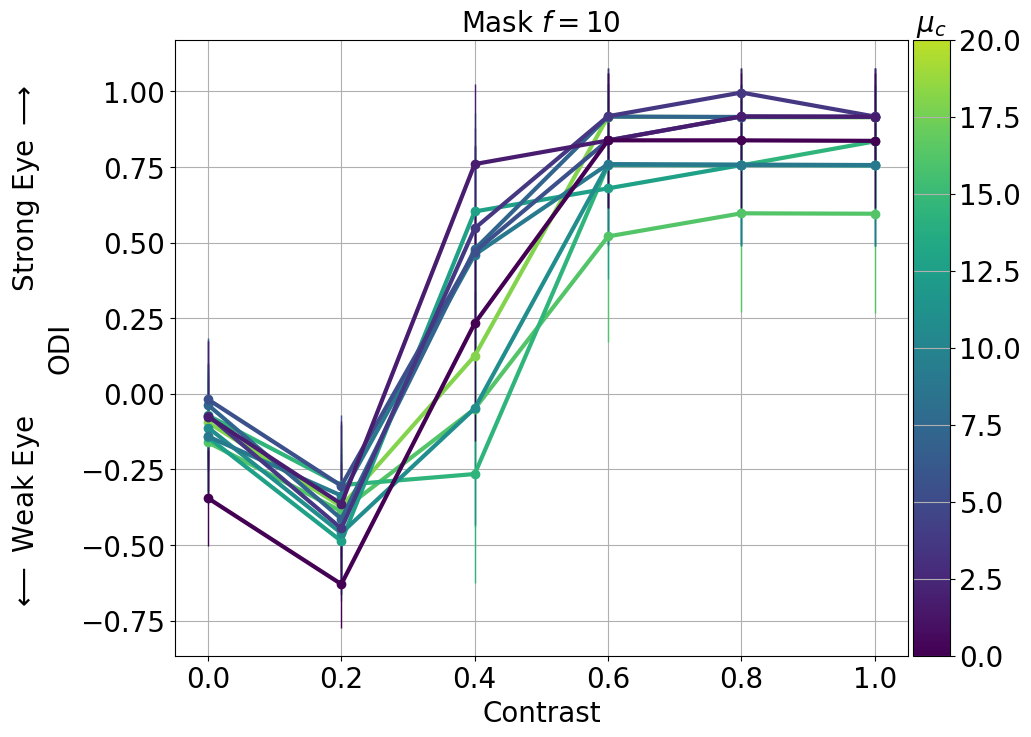

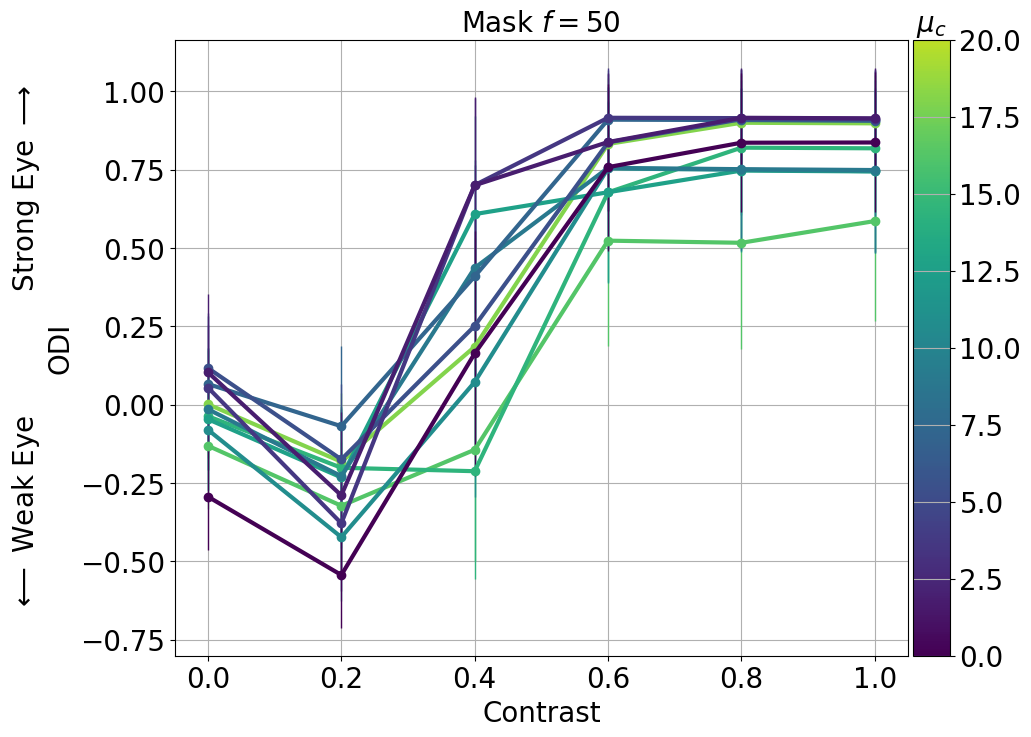

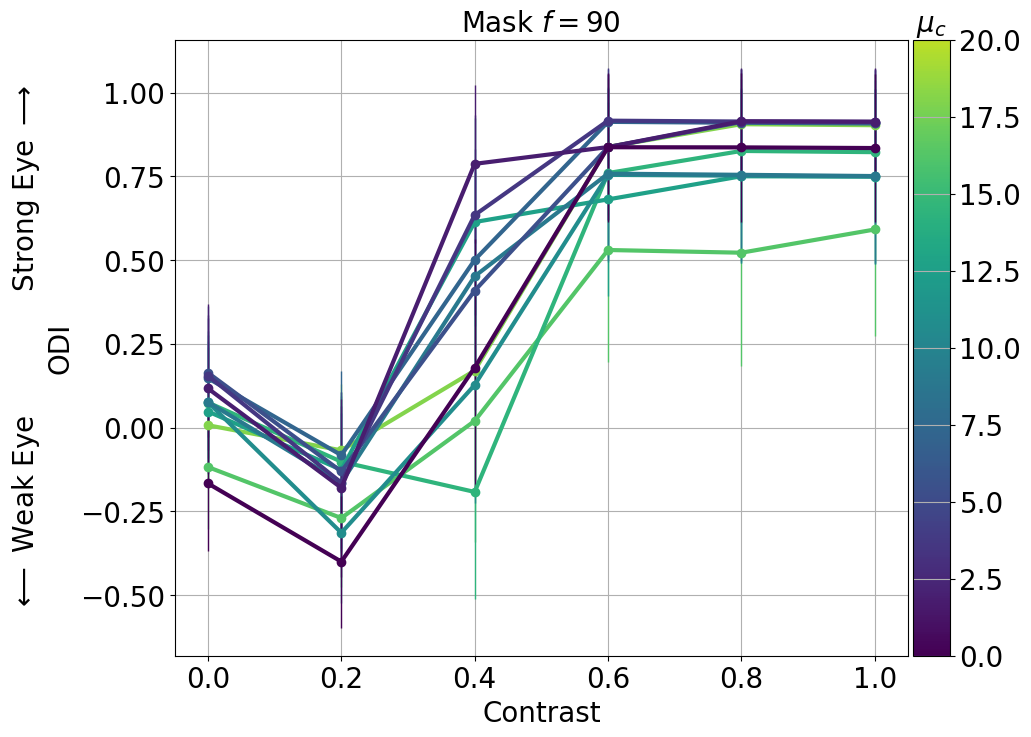

In [45]:
figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n] and 
        _.sigma_c==sigma_c_mat[n] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

                
    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')


for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n] and 
            _.sigma_c==sigma_c_mat[n] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            μ,σ=μσ(R.ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()


        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                    norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\mu_c$')



In [50]:
R.ODI[-1].shape

(25,)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

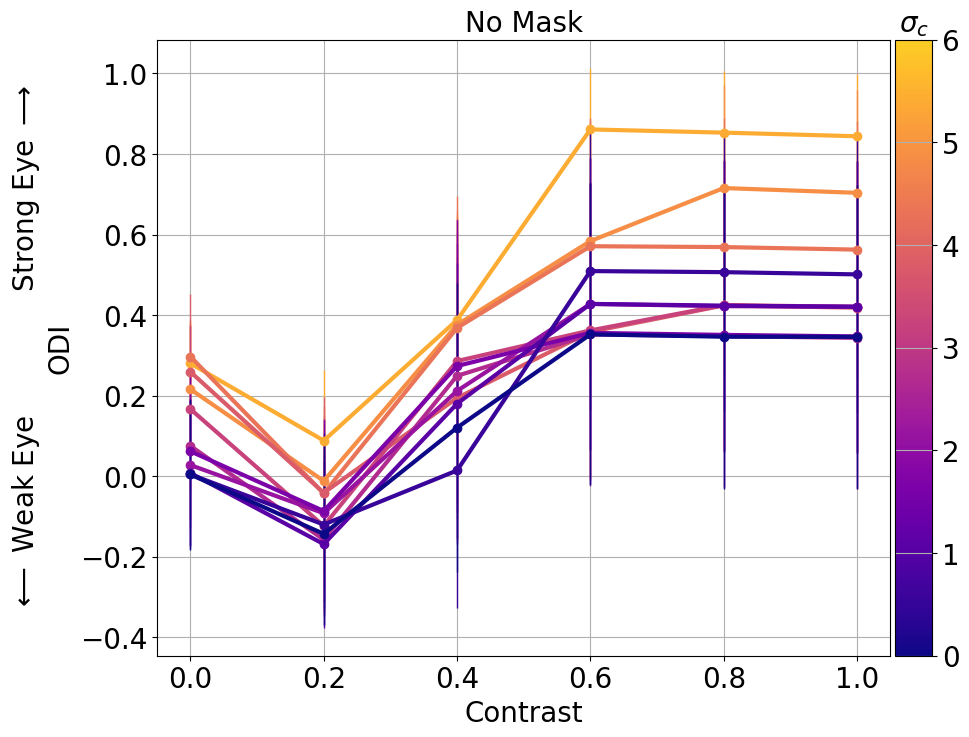

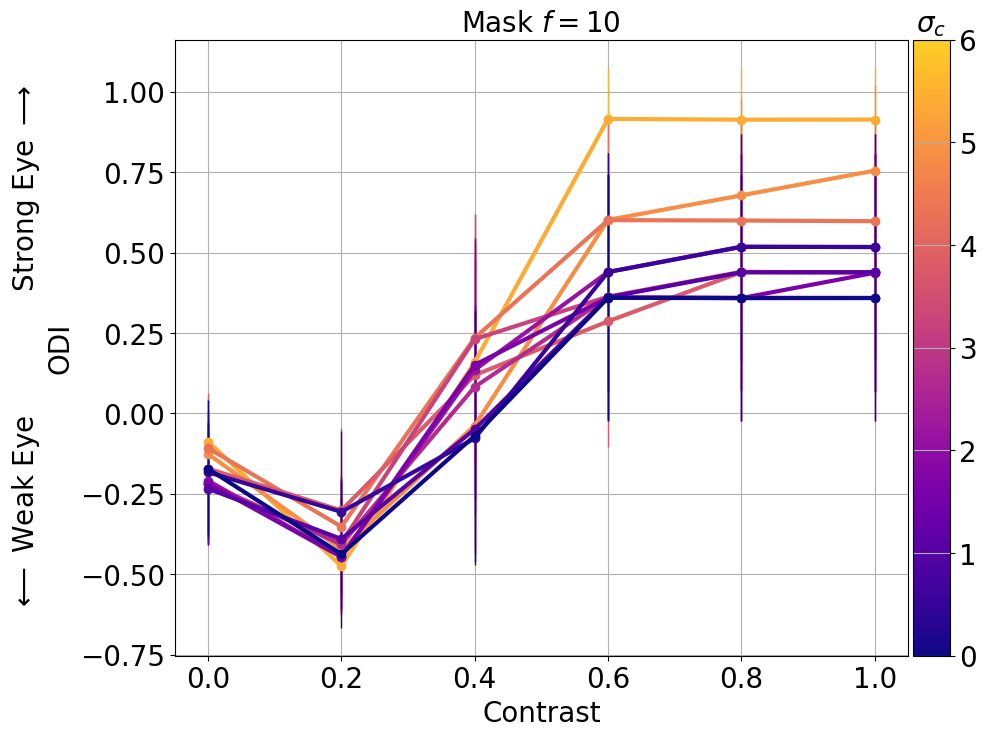

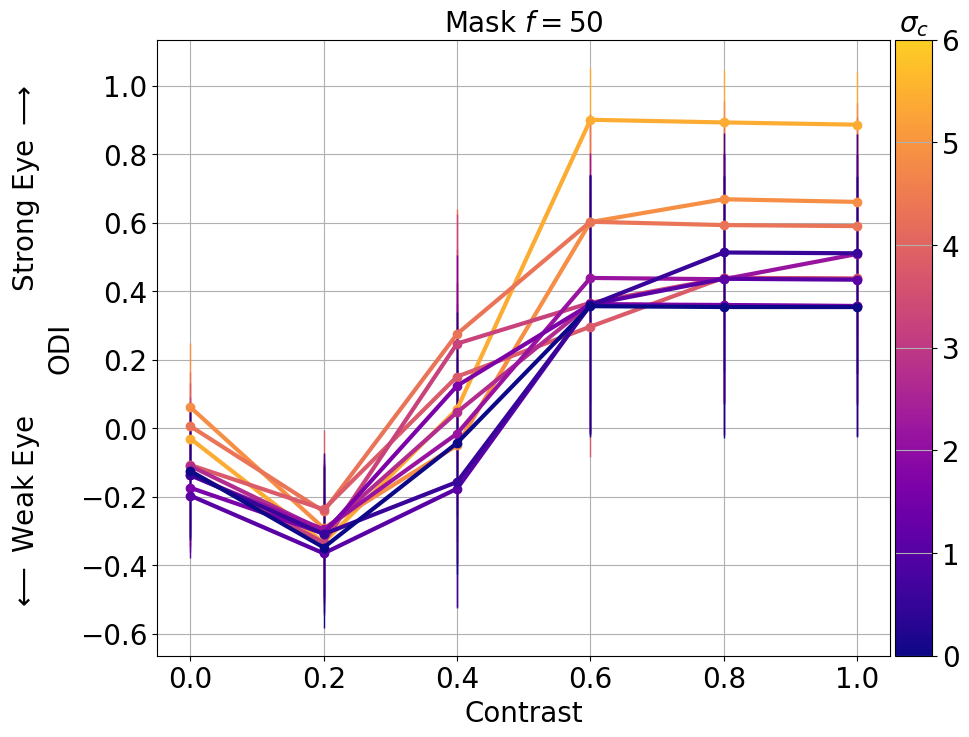

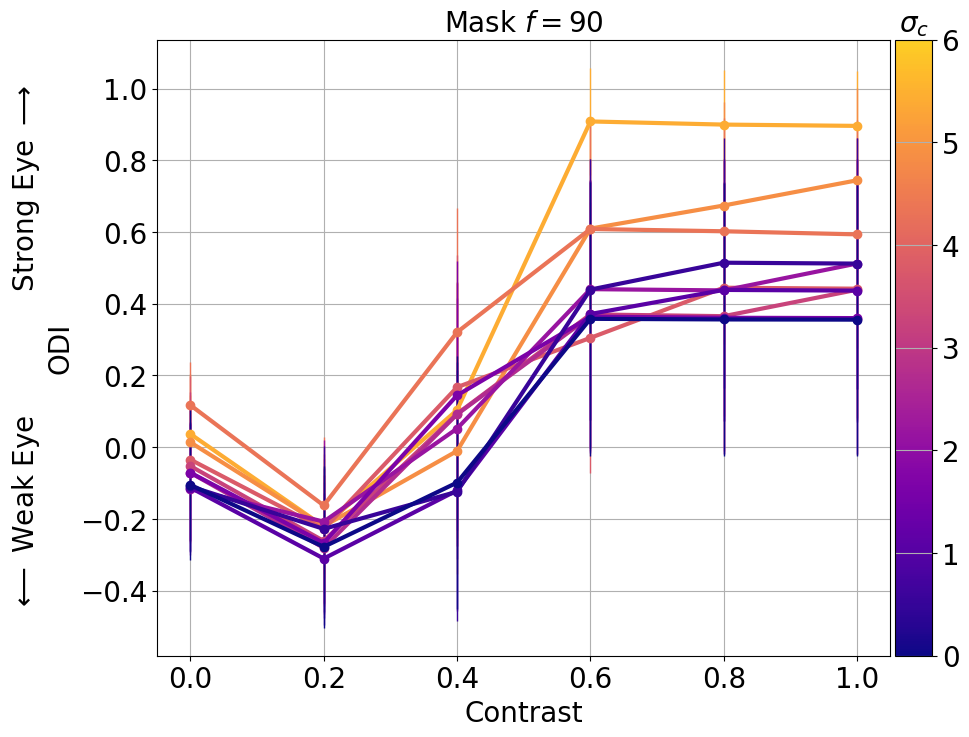

In [46]:
figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n+Nsim] and 
        _.sigma_c==sigma_c_mat[n+Nsim] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        μ,σ=μσ(R.ODI[-1])

        s+=contrast,μ,σ

    contrast,μ,σ=s.arrays()

    errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\sigma_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n+Nsim] and 
            _.sigma_c==sigma_c_mat[n+Nsim] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            μ,σ=μσ(R.ODI[-1])

            s+=contrast,μ,σ

        contrast,μ,σ=s.arrays()

        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\sigma_c$')



## Rate of recovery

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

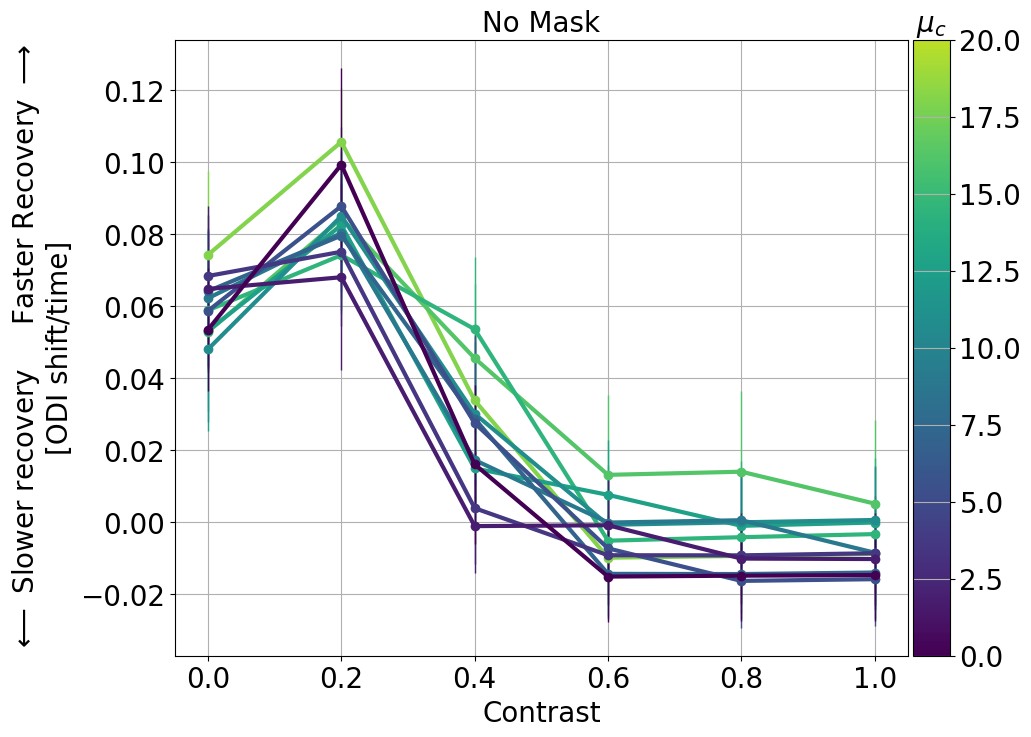

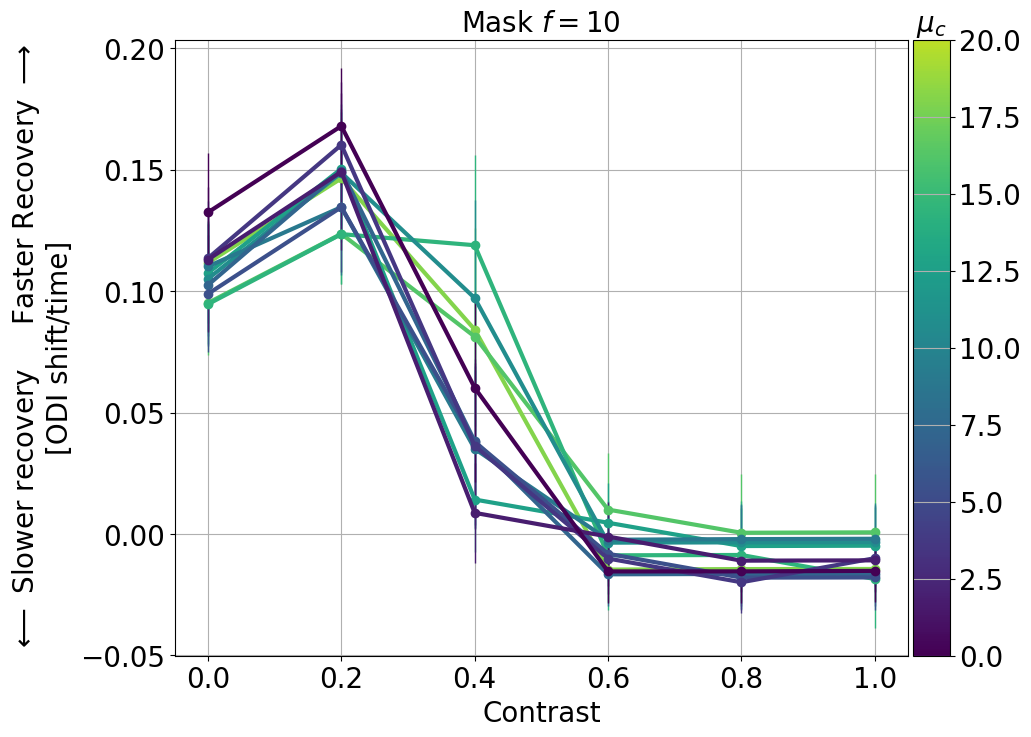

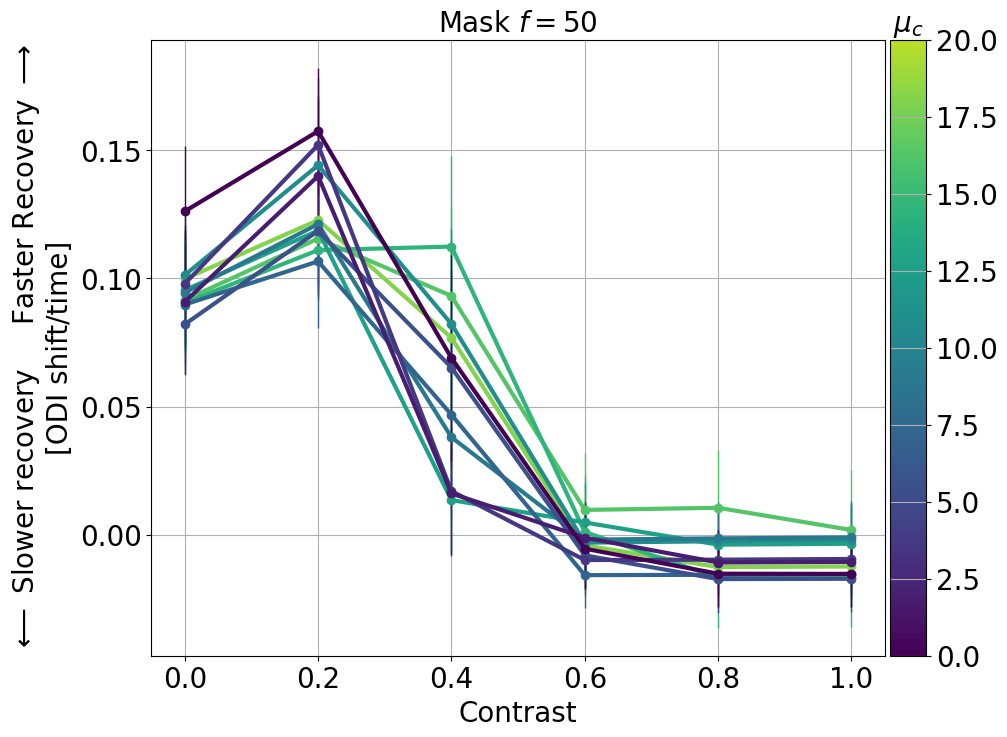

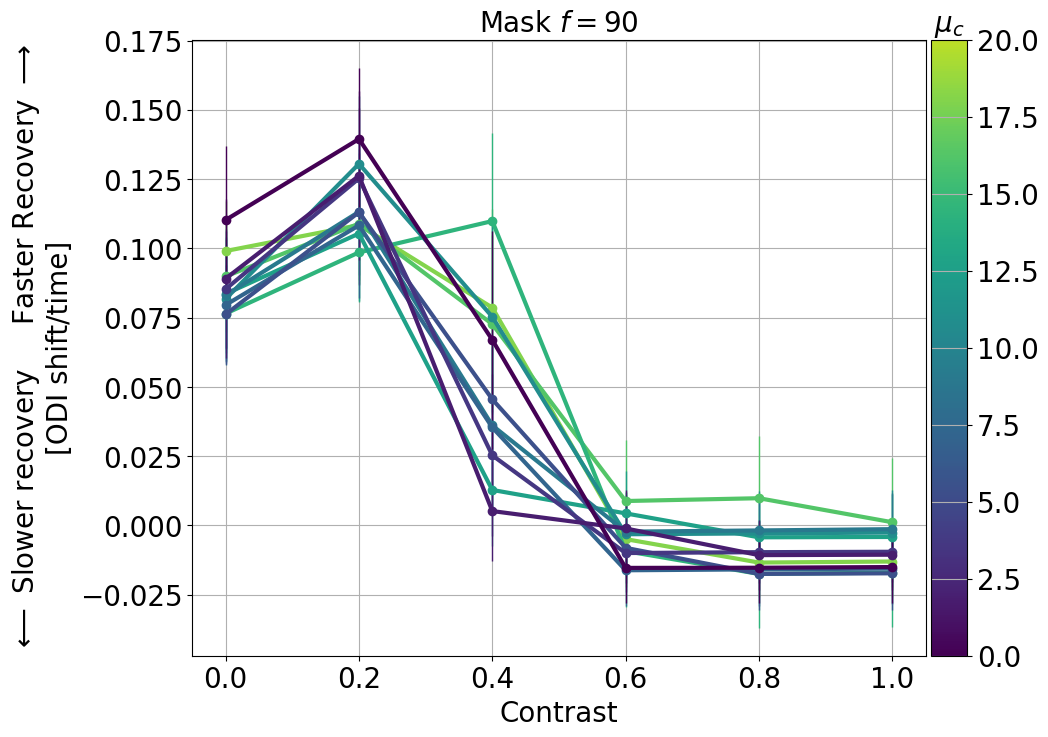

In [47]:

figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n] and 
        _.sigma_c==sigma_c_mat[n] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

        s+=contrast,recovery_rate_μ,recovery_rate_σ

    contrast,μ,σ=s.arrays()

                
    errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\mu_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n] and 
            _.sigma_c==sigma_c_mat[n] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

            s+=contrast,recovery_rate_μ,recovery_rate_σ

        contrast,μ,σ=s.arrays()


        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=viridis(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=viridis,
                                    norm=mpl.colors.Normalize(vmin=mu_c_mat.min(), vmax=mu_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\mu_c$')



In [57]:
R.ODI[-1,:],R.ODI[0,:]

(array([ 0.98068741,  0.99603542,  0.99128127,  0.97387442,  0.99352166,
         0.9813871 ,  0.99741916, -0.98219875,  0.9978031 ,  0.99300512,
         0.97233822, -0.99100592,  0.97216057, -0.99195213, -0.98925681,
        -0.99418412,  0.9967973 ,  0.99292123, -0.99458947, -0.99307081,
         0.99745361,  0.99672847,  0.99503452,  0.98057616, -0.98266036]),
 array([ 0.97519918,  0.98976176,  0.74155364,  0.95923197,  0.98474335,
         0.91501002,  0.98959457, -0.15025848,  0.95859665,  0.47796114,
         0.95609359, -0.3978019 ,  0.67589053, -0.40535211, -0.36231878,
        -0.36598259,  0.70553277,  0.62709024, -0.41990638, -0.308609  ,
         0.82564703,  0.87389885,  0.90595359,  0.90919007, -0.1267841 ]))

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

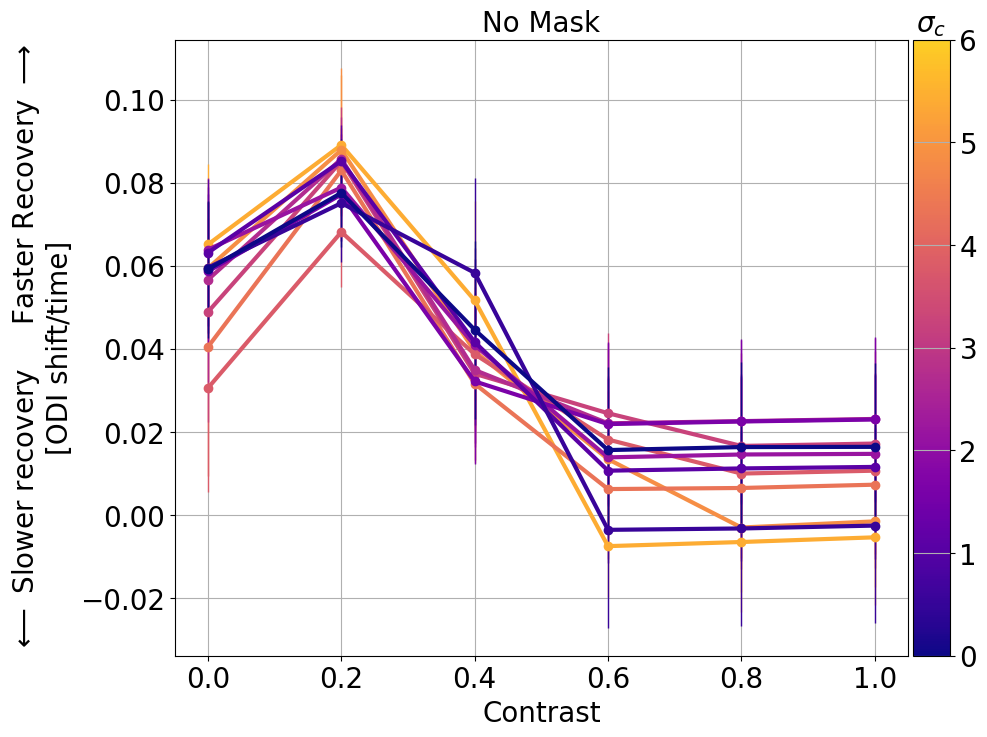

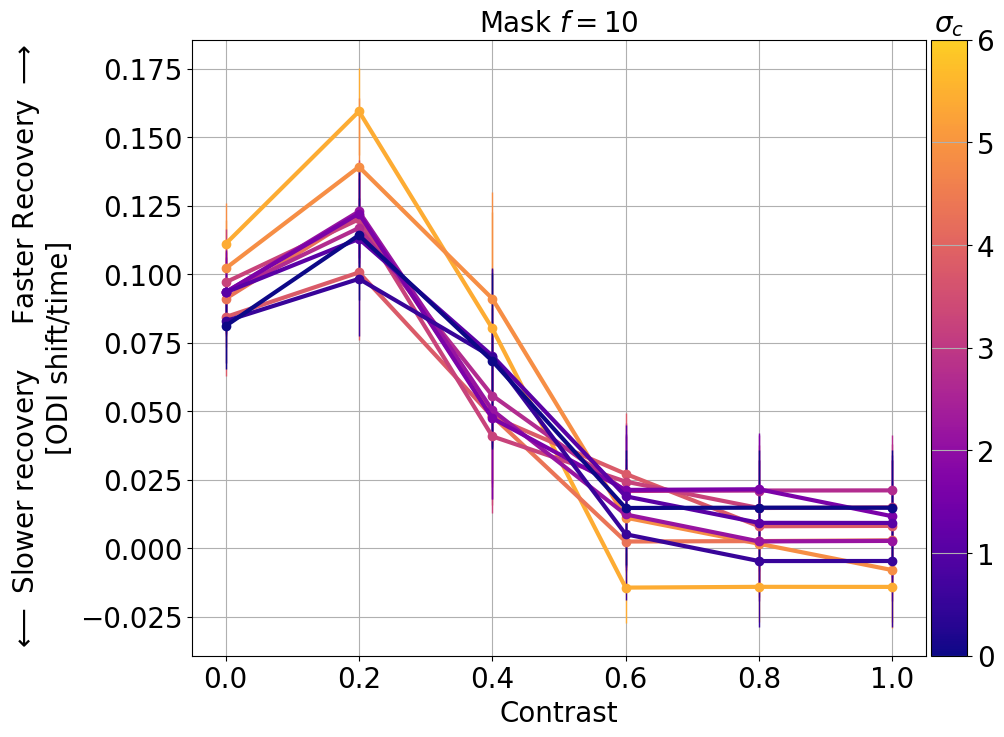

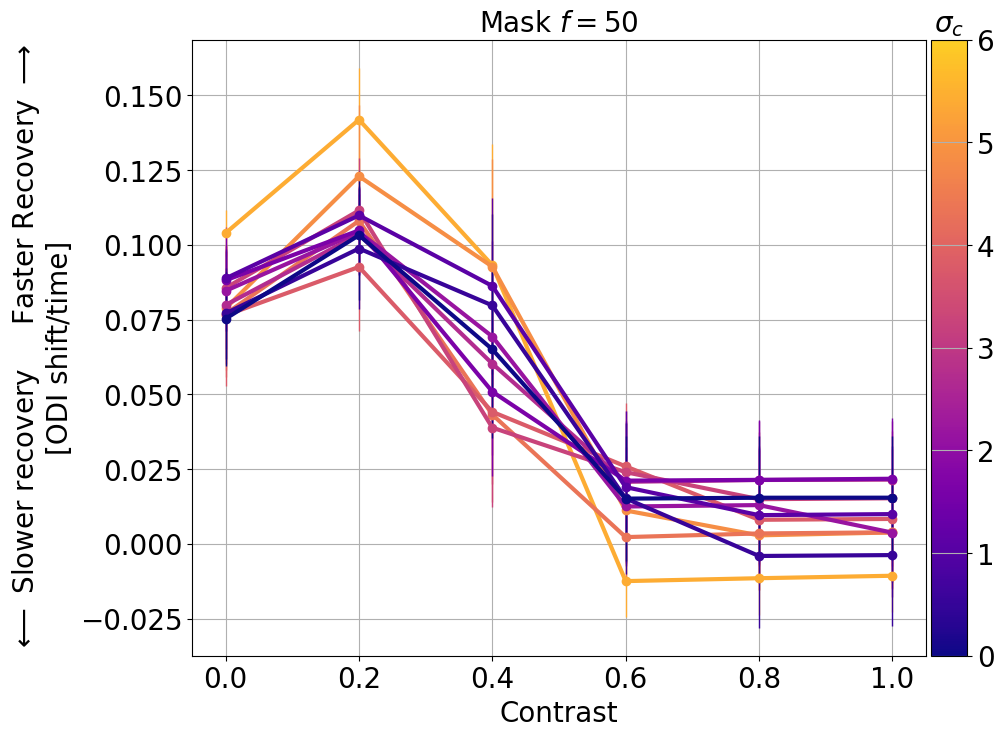

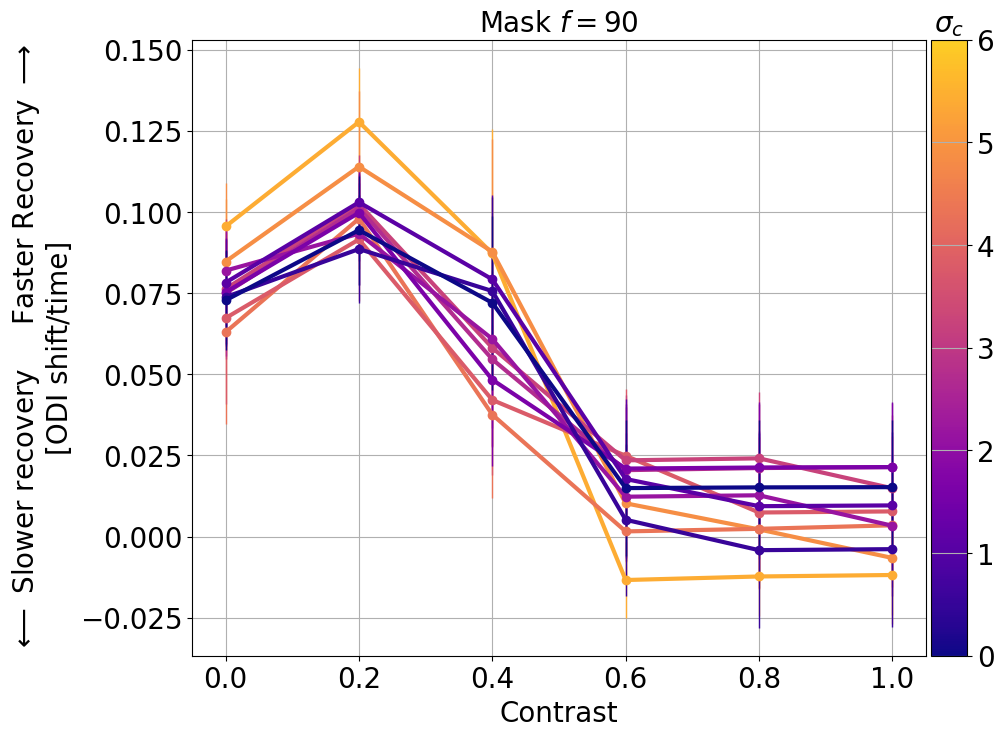

In [48]:
figure()
for n in tqdm(range(Nsim),total=Nsim): 
    select_params=[_ for _ in all_params if 
        _.mu_c==mu_c_mat[n+Nsim] and 
        _.sigma_c==sigma_c_mat[n+Nsim] and 
        _.mask==0]
    assert len(select_params)==len(contrast_mat)    
    
    s=Storage()
    for params in tqdm(select_params):
        R=Results(params.sfname)
        contrast=params.contrast
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

        s+=contrast,recovery_rate_μ,recovery_rate_σ

    contrast,μ,σ=s.arrays()

    errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title('No Mask')
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
title(r'$\sigma_c$')

for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
    
    figure()

    for n in tqdm(range(Nsim),total=Nsim): 
        select_params=[_ for _ in all_params if 
            _.mu_c==mu_c_mat[n+Nsim] and 
            _.sigma_c==sigma_c_mat[n+Nsim] and 
            _.f==f and
            _.mask==1]
        assert len(select_params)==len(contrast_mat)    

        s=Storage()
        for params in tqdm(select_params):
            R=Results(params.sfname)
            contrast=params.contrast
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

            s+=contrast,recovery_rate_μ,recovery_rate_σ

        contrast,μ,σ=s.arrays()

        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=plasma(v[n]))


    xlabel('Contrast')
    ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
    title(f'Mask $f={f}$')

    divider = make_axes_locatable(plt.gca())
    ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
    ax_cb.grid(False)
    cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=plasma,
                                    norm=mpl.colors.Normalize(vmin=sigma_c_mat.min(), vmax=sigma_c_mat.max()),orientation='vertical')
    plt.gcf().add_axes(ax_cb)
    ax_cb.grid(True)
    title(r'$\sigma_c$')



In [ ]:
count=0

v=np.flip(linspace(0.3,1,len(f_mat)))
figcount=0

for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    figure()
    for mask in mask_mat:
        if mask:
            for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
                s=Storage()
                for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                    params=all_params[count]
                    count+=1
                    R=Results(params.sfname)
                    #R=RR[params.sfname]
                    contrast=params.contrast
                    t=R.t/day
                    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

                    s+=contrast,recovery_rate_μ,recovery_rate_σ
                    
                contrast,μ,σ=s.arrays()

                
                errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
                
        else:
            s=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=all_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  

                s+=contrast,recovery_rate_μ,recovery_rate_σ

            contrast,μ,σ=s.arrays()

            errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')

            
        xlabel('Contrast')
        ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
        title(f'μc={mu_c} σc={sigma_c} blur={blur}')

                    

    divider = make_axes_locatable(plt.gca())
    ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
    ax_cb2.grid(False)
    cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
    ax_cb2.grid(True)
    plt.gcf().add_axes(ax_cb2)
    title(r'$f$')



    figcount+=1
    
    if figcount==2:
        break


In [ ]:
mu_c,sigma_c=7.5,2

#[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

In [ ]:
count=0


figcount=0
mu_c,sigma_c=0,0
plot_params=[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

fig1_results=[]
fig2_results=[]
fig3_results=[]
for mask in mask_mat:
    if mask:
        for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
            s=Storage()
            s2=Storage()
            s3=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=plot_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ1,μ2=R.μσ[0][0]
                σ1,σ2=R.μσ[1][0]

                s+=contrast,μ1,μ2,σ1,σ2
                
                μ,σ=μσ(R.ODI[-1])
                s2+=contrast,μ,σ
                
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
                s3+=contrast,recovery_rate_μ,recovery_rate_σ
                
                

            contrast,μ1,μ2,σ1,σ2=s.arrays()
            fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )
            
            contrast,μ,σ=s2.arrays()
            fig2_results.append( (contrast,μ,σ,fc,mask) )
            
            contrast,μ,σ=s3.arrays()
            fig3_results.append( (contrast,μ,σ,fc,mask) )
            

    else:
        s=Storage()
        s2=Storage()
        s3=Storage()
        for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

            params=plot_params[count]
            count+=1
            R=Results(params.sfname)
            #R=RR[params.sfname]
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=contrast,μ1,μ2,σ1,σ2

            
            μ,σ=μσ(R.ODI[-1])
            s2+=contrast,μ,σ
            
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
            s3+=contrast,recovery_rate_μ,recovery_rate_σ
            
            
            
        contrast,μ1,μ2,σ1,σ2=s.arrays()
        fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )

        contrast,μ,σ=s2.arrays()
        fig2_results.append( (contrast,μ,σ,fc,mask) )

        contrast,μ,σ=s3.arrays()
        fig3_results.append( (contrast,μ,σ,fc,mask) )




In [ ]:
figure(figsize=(32,21))
v=np.flip(linspace(0.3,1,len(f_mat)))

subplot(2,2,1)

for contrast,μ1,μ2,σ1,σ2,fc,mask in fig1_results:
    if mask:
        if fc==1:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[fc]))

        else:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[fc]))
    else:
        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color='black')
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color='gray')
        
xlabel('Contrast')
ylabel('Maximum Response')
title(f'μc={mu_c} σc={sigma_c} blur={blur}')
legend()                        
        
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\sigma_f$') 
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

subplot(2,2,2)

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-mask-response-ODI-contrast-mu0-sigma0.png')    
        

In [ ]:
count=0


figcount=0
mu_c,sigma_c=7.5,2
plot_params=[p for p in all_params if p.mu_c==mu_c and p.sigma_c==sigma_c]

fig1_results=[]
fig2_results=[]
fig3_results=[]
for mask in mask_mat:
    if mask:
        for fc,f in tqdm(enumerate(f_mat),total=len(f_mat)):
            s=Storage()
            s2=Storage()
            s3=Storage()
            for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

                params=plot_params[count]
                count+=1
                R=Results(params.sfname)
                #R=RR[params.sfname]
                contrast=params.contrast
                μ1,μ2=R.μσ[0][0]
                σ1,σ2=R.μσ[1][0]

                s+=contrast,μ1,μ2,σ1,σ2
                
                μ,σ=μσ(R.ODI[-1])
                s2+=contrast,μ,σ
                
                t=R.t/day
                recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
                s3+=contrast,recovery_rate_μ,recovery_rate_σ
                
                

            contrast,μ1,μ2,σ1,σ2=s.arrays()
            fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )
            
            contrast,μ,σ=s2.arrays()
            fig2_results.append( (contrast,μ,σ,fc,mask) )
            
            contrast,μ,σ=s3.arrays()
            fig3_results.append( (contrast,μ,σ,fc,mask) )
            

    else:
        s=Storage()
        s2=Storage()
        s3=Storage()
        for contrast_count,contrast in tqdm(enumerate(contrast_mat),total=len(contrast_mat)):

            params=plot_params[count]
            count+=1
            R=Results(params.sfname)
            #R=RR[params.sfname]
            contrast=params.contrast
            μ1,μ2=R.μσ[0][0]
            σ1,σ2=R.μσ[1][0]

            s+=contrast,μ1,μ2,σ1,σ2

            
            μ,σ=μσ(R.ODI[-1])
            s2+=contrast,μ,σ
            
            t=R.t/day
            recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[-1,:]-R.ODI[0,:])/(t[-1]-t[0]))  
            s3+=contrast,recovery_rate_μ,recovery_rate_σ
            
            
            
        contrast,μ1,μ2,σ1,σ2=s.arrays()
        fig1_results.append( (contrast,μ1,μ2,σ1,σ2,fc,mask) )

        contrast,μ,σ=s2.arrays()
        fig2_results.append( (contrast,μ,σ,fc,mask) )

        contrast,μ,σ=s3.arrays()
        fig3_results.append( (contrast,μ,σ,fc,mask) )




In [ ]:
figure(figsize=(32,21))
v=np.flip(linspace(0.3,1,len(f_mat)))

subplot(2,2,1)

for contrast,μ1,μ2,σ1,σ2,fc,mask in fig1_results:
    if mask:
        if fc==1:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[fc]))

        else:
            errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
            errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color=cm.Oranges(v[fc]))
    else:
        errorbar(contrast,μ1,yerr=2*σ1,marker='o',elinewidth=1,color='black')
        errorbar(contrast,μ2,yerr=2*σ2,marker='s',elinewidth=1,color='gray')
        
xlabel('Contrast')
ylabel('Maximum Response')
title(f'μc={mu_c} σc={sigma_c} blur={blur}')
legend()                        
        
        
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)   
ax_cb.grid(False)
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=Blues2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=Oranges2,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
plt.gcf().add_axes(ax_cb)
ax_cb.grid(True)
ax_cb.set_yticklabels([])
ax_cb2.grid(True)
title(r'$\sigma_f$') 
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

subplot(2,2,2)

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 

ax=subplot(2,2,3)
pos=ax.get_position().bounds
ax.set_position([pos[0]+.2,pos[1],pos[2],pos[3]])

for contrast,μ,σ,fc,mask in fig2_results:
    if mask:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color=cm.Blues(v[fc]))
    else:
        errorbar(contrast,-μ,yerr=2*σ,marker='o',elinewidth=1,color='black')
        
    
            
ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)

xlabel('Contrast')
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
title(f'μc={mu_c} σc={sigma_c} blur={blur}')

divider = make_axes_locatable(plt.gca())
ax_cb2 = divider.new_horizontal(size="5%", pad=0.05)    
ax_cb2.grid(False)
cb2 = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cm.Blues,norm=mpl.colors.Normalize(vmin=f_mat[0], vmax=f_mat[-1]),orientation='vertical')
ax_cb2.grid(True)
plt.gcf().add_axes(ax_cb2)
title(r'$\sigma_f$') 


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')


plt.text(.23, 0.46, "C", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-mask-response-ODI-contrast-mu75-sigma2.png')    
        